An International Perspective on Primary Education, Gender, and the Labor Market

Data Cleaning and Preparation
University of California, Berkeley | DATASCI 200
Jordan Andersen, Courtney Chen, Maia Kennedy

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load WDI df
df = pd.read_csv('/Users/courtneychen/Desktop/DATASCI200 Project 2/Original Datasets/WDICSV.csv')

# display the df head
print(df.head())

                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2014       2015       2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  17.401410  17.911234  18.463874   
1   NaN   NaN   NaN   NaN   NaN  ...   6.728819   7.005877   7.308571   
2   NaN   N

In [76]:
# drop unwanted years
dropped_years = [str(i) for i in range(1960,2017,1)]
print(*dropped_years)
df = df.drop(labels=dropped_years, axis=1)
print(df.head())

1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
4  Access to electricity, rural (% of rural popul...  EG.

In [77]:
# load income df
income_df = pd.read_excel('/Users/courtneychen/Desktop/DATASCI200 Project 2/Original Datasets/CLASS.xlsx')
print(income_df.head())
income_df = income_df[income_df['Income group'].notna() & (income_df['Income group'] != '')]
print(len(income_df))

# filter WDI df to only contain countries in income df
df = df[df['Country Code'].isin(income_df['Code'])]
print(df['Country Code'].value_counts())

          Economy Code                      Region         Income group  \
0     Afghanistan  AFG                  South Asia           Low income   
1         Albania  ALB       Europe & Central Asia  Upper middle income   
2         Algeria  DZA  Middle East & North Africa  Upper middle income   
3  American Samoa  ASM         East Asia & Pacific          High income   
4         Andorra  AND       Europe & Central Asia          High income   

  Lending category  
0              IDA  
1             IBRD  
2             IBRD  
3              NaN  
4              NaN  
217
Country Code
AFG    1496
OMN    1496
NRU    1496
NPL    1496
NLD    1496
       ... 
GIB    1496
GRC    1496
GRL    1496
GRD    1496
ZWE    1496
Name: count, Length: 216, dtype: int64


In [78]:
# feature selection
features = ['Children in employment, female (% of female children ages 7-14)',
            'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
            'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)',
            'School enrollment, primary and secondary (gross), gender parity index (GPI)',
            'Unemployment, male (% of male labor force) (modeled ILO estimate)',
            'Unemployment, female (% of female labor force) (modeled ILO estimate)',
            'School enrollment, primary (% gross)',
            'School enrollment, primary, female (% gross)',
            'School enrollment, primary, male (% gross)',
            'School enrollment, secondary, female (% gross)',
            'School enrollment, secondary, male (% gross)',
            ]

df = df[(df['Indicator Name'].isin(features))]
print(df['Indicator Name'].value_counts())

# convert spaces to underscore in feature names
df.columns = df.columns.str.replace(' ', '_')

Indicator Name
Children in employment, female (% of female children ages 7-14)                                    216
Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)    216
Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)        216
School enrollment, primary (% gross)                                                               216
School enrollment, primary and secondary (gross), gender parity index (GPI)                        216
School enrollment, primary, female (% gross)                                                       216
School enrollment, primary, male (% gross)                                                         216
School enrollment, secondary, female (% gross)                                                     216
School enrollment, secondary, male (% gross)                                                       216
Unemployment, female (% of female labor force) (modeled IL

In [79]:
# # create array of 2017-2023
# #CHANGE
year_columns = [str(year) for year in range(2017, 2024)]

# drop rows with 6+ null values
df = df[df[year_columns].count(axis=1) >= 5]
print(df['Indicator_Name'].value_counts())

# drop rows with 6+ zeros
df = df[df[year_columns].apply(lambda row: (row == 0).sum(), axis=1) < 6]
print('')
print(df['Indicator_Name'].value_counts())

Indicator_Name
Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)    186
Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)        186
Unemployment, female (% of female labor force) (modeled ILO estimate)                              186
Unemployment, male (% of male labor force) (modeled ILO estimate)                                  186
School enrollment, primary (% gross)                                                               157
School enrollment, primary, female (% gross)                                                       157
School enrollment, primary, male (% gross)                                                         157
School enrollment, secondary, female (% gross)                                                     124
School enrollment, secondary, male (% gross)                                                       124
School enrollment, primary and secondary (gross), gender p

In [80]:
# join income dataset with master
df_merged = pd.merge(df, income_df[['Code', 'Income group']], left_on='Country_Code', right_on='Code', how='inner').drop(columns='Code')

In [81]:
# reformat
last_column = df_merged.pop("Income group")
df_merged.insert(3, "Income_Group", last_column)
print(df_merged.head())

  Country_Name Country_Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4      Albania          ALB   

                                      Indicator_Name         Income_Group  \
0  Labor force participation rate, female (% of f...           Low income   
1  Labor force participation rate, male (% of mal...           Low income   
2  Unemployment, female (% of female labor force)...           Low income   
3  Unemployment, male (% of male labor force) (mo...           Low income   
4  Labor force participation rate, female (% of f...  Upper middle income   

      Indicator_Code    2017    2018    2019    2020    2021    2022    2023  
0  SL.TLF.CACT.FE.ZS  21.227  19.836  18.402  16.463  14.787   5.153   4.828  
1  SL.TLF.CACT.MA.ZS  73.356  71.269  69.228  66.689  67.703  70.153  69.116  
2  SL.UEM.TOTL.FE.ZS  14.020  14.782  15.562  16.782  16.871  26.746  27.288  
3  SL.UEM.TOTL.MA.ZS  10.365  10.2

In [82]:
by_poverty_gap = df_merged[df_merged['Indicator_Name'] == 'Poverty gap at $2.15 a day (2017 PPP) (%)']
country_counts_income = by_poverty_gap.groupby('Income_Group')['Country_Name'].nunique()
country_counts_income

Series([], Name: Country_Name, dtype: int64)

In [83]:
# melt df
filtered_melted = pd.melt(df_merged, id_vars= ['Country_Name', 'Country_Code', 'Indicator_Code', 'Indicator_Name', 'Income_Group'], value_vars = year_columns, var_name = 'Year', value_name = 'Value')
filtered_melted.head()

,Country_Name,Country_Code,Indicator_Code,Indicator_Name,Income_Group,Year,Value
0,Afghanistan,AFG,SL.TLF.CACT.FE.ZS,"Labor force participation rate, female (% of f...",Low income,2017,21.227
1,Afghanistan,AFG,SL.TLF.CACT.MA.ZS,"Labor force participation rate, male (% of mal...",Low income,2017,73.356
2,Afghanistan,AFG,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",Low income,2017,14.020
3,Afghanistan,AFG,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",Low income,2017,10.365
4,Albania,ALB,SL.TLF.CACT.FE.ZS,"Labor force participation rate, female (% of f...",Upper middle income,2017,49.609


In [84]:
filtered_melted.columns = filtered_melted.columns.str.lower()
filtered_melted

,country_name,country_code,indicator_code,indicator_name,income_group,year,value
0,Afghanistan,AFG,SL.TLF.CACT.FE.ZS,"Labor force participation rate, female (% of f...",Low income,2017,21.227
1,Afghanistan,AFG,SL.TLF.CACT.MA.ZS,"Labor force participation rate, male (% of mal...",Low income,2017,73.356
2,Afghanistan,AFG,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",Low income,2017,14.020
3,Afghanistan,AFG,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",Low income,2017,10.365
4,Albania,ALB,SL.TLF.CACT.FE.ZS,"Labor force participation rate, female (% of f...",Upper middle income,2017,49.609
...,...,...,...,...,...,...,...
10460,Zimbabwe,ZWE,SE.PRM.ENRR,"School enrollment, primary (% gross)",Lower middle income,2023,NaN
10461,Zimbabwe,ZWE,SE.PRM.ENRR.FE,"School enrollment, primary, female (% gross)",Lower middle income,2023,NaN
10462,Zimbabwe,ZWE,SE.PRM.ENRR.MA,"School enrollment, primary, male (% gross)",Lower middle income,2023,NaN
10463,Zimbabwe,ZWE,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",Lower middle income,2023,8.824


In [85]:
# removing null values
filtered_melted = filtered_melted.dropna()
len(filtered_melted)

9871

In [86]:
# download excel file
filtered_melted.to_excel('WDI_Master.xlsx', index=False)

### Feature Overview Visualization

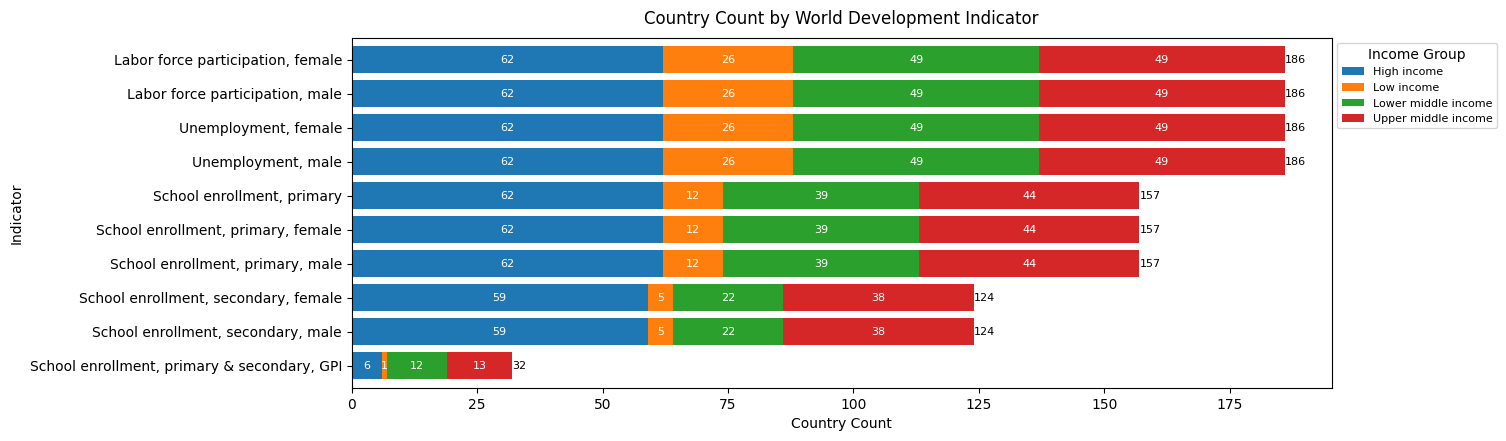

In [87]:
# filter out poverty indicators
overview = filtered_melted[~filtered_melted['indicator_name'].isin([
    'Poverty gap at $2.15 a day (2017 PPP) (%)', 
    'Poverty headcount ratio at national poverty lines (% of population)'
])]

overview_unique = overview.drop_duplicates(subset=['country_name', 'indicator_name'])

# pivot the data to get a count of countries per income group per indicator
pivot_df = overview_unique.groupby(['indicator_name', 'income_group']).size().unstack(fill_value=0)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]

# plot stacked horizontal bar chart with narrower bar spacing
fig, ax = plt.subplots(figsize=(14, 5))  # Wider and shorter figure

# Plot the horizontal bar chart
pivot_df.plot(
    kind='barh', 
    stacked=True, 
    ax=ax, 
    width=0.8  # Reduce bar height to create narrower spaces
)

# labels and title
plt.xlabel('Country Count')
plt.ylabel('Indicator')
plt.title('Country Count by World Development Indicator', pad=10)
plt.legend(
    fontsize=8, 
    title='Income Group', 
    loc='upper left', 
    bbox_to_anchor=(1.0, 1.0)
)

# add counts per bar segment (income group)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{int(width)}', (x, y), color='white', ha='center', va='center', size=8)

# add total counts per bar
totals = pivot_df.sum(axis=1)
for i, total in enumerate(totals):
    ax.annotate(f'{int(total)}', (total, i), color='black', ha='left', va='center', size=8)

# set y-axis tick labels
plt.yticks(
    ticks=range(len(pivot_df)), 
    labels=[
        'School enrollment, primary & secondary, GPI',
        'School enrollment, secondary, male', 
        'School enrollment, secondary, female',
        'School enrollment, primary, male', 
        'School enrollment, primary, female', 
        'School enrollment, primary', 
        'Unemployment, male', 
        'Unemployment, female',
        'Labor force participation, male', 
        'Labor force participation, female',
    ]
)

# adjust layout to reduce padding and emphasize width
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.9, top=0.85, bottom=0.15)
plt.show()
